Question 4 (A), Part I

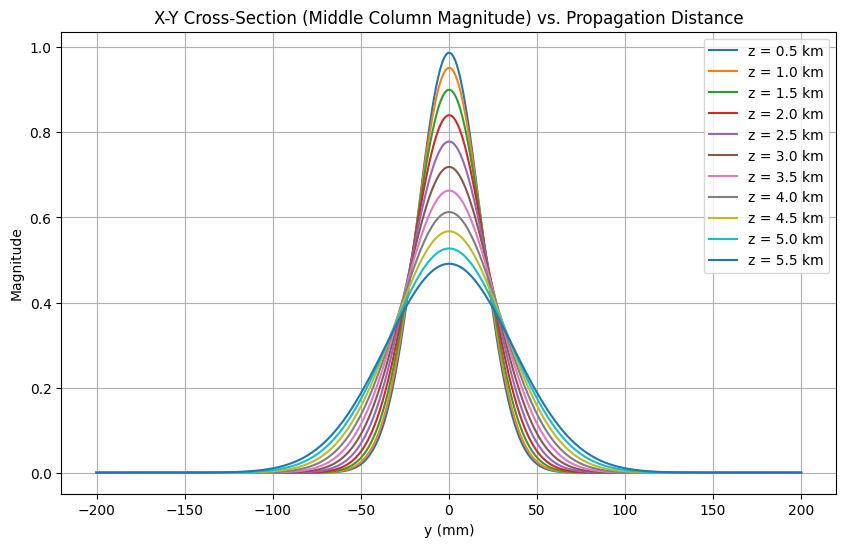

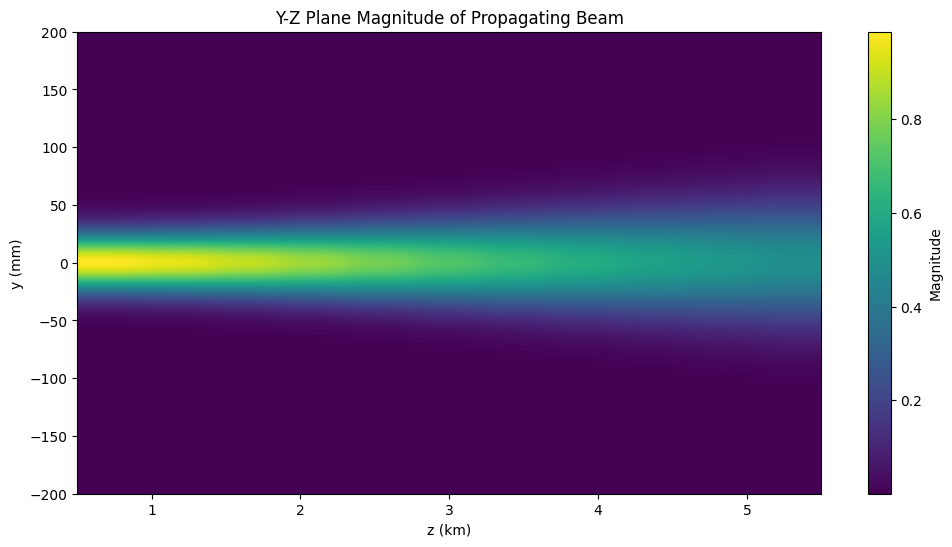

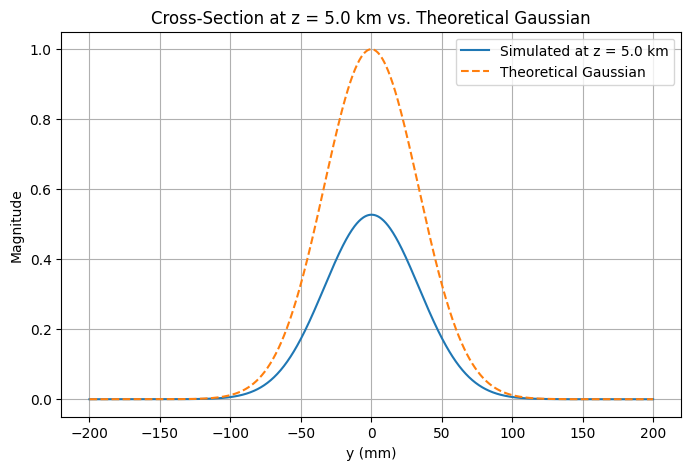

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N):
    """Calculate electric field propagation using angular spectrum method"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    # Handle evanescent waves (where kx^2 + ky^2 > k^2)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(E0)
    U = U0 * H
    E = np.fft.ifft2(U)
    
    mag = np.abs(E)
    return mag, X, Y

def gaussian_beam(xmax, N, w0):
    """Generate initial Gaussian beam field"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    return np.exp(-(X**2 + Y**2) / w0**2)

def analyze_cross_section_and_yz_plane():
    # Parameters
    xmax = 0.20          # 20 cm in meters
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633 nm in meters
    w0 = 0.025           # 25 mm beam waist in meters
    
    # Propagation distances
    z_values = np.arange(500, 5501, 500)  # 500 m to 5500 m, step 500 m
    
    # Generate initial field
    E0 = gaussian_beam(xmax, N, w0)
    
    # Arrays to store cross-sections and y-z plane data
    cross_sections = np.zeros((N, len(z_values)))  # Middle column magnitudes
    yz_plane = np.zeros((N, len(z_values)))        # Y-Z plane magnitudes
    
    # Propagate field at each z and extract data
    for i, z in enumerate(z_values):
        mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z, xmax, N)
        # Middle column (x = 0, along y-axis)
        middle_column = mag_z[:, N//2]
        cross_sections[:, i] = middle_column
        yz_plane[:, i] = middle_column  # Same data for y-z plane plotting
    
    # Plot 1: Cross-sections at different z values
    plt.figure(figsize=(10, 6))
    y_coords = np.linspace(-xmax, xmax, N) * 1000  # Convert to mm
    for i, z in enumerate(z_values):
        plt.plot(y_coords, cross_sections[:, i], label=f'z = {z/1000:.1f} km')
    plt.title('X-Y Cross-Section (Middle Column Magnitude) vs. Propagation Distance')
    plt.xlabel('y (mm)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 2: Y-Z plane magnitude
    plt.figure(figsize=(12, 6))
    extent = [z_values[0]/1000, z_values[-1]/1000, -xmax*1000, xmax*1000]  # z in km, y in mm
    plt.imshow(yz_plane, aspect='auto', extent=extent, cmap='viridis', origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title('Y-Z Plane Magnitude of Propagating Beam')
    plt.xlabel('z (km)')
    plt.ylabel('y (mm)')
    plt.show()

    # Compare cross-section at z=5000 m with theoretical Gaussian
    z_compare = 5000  # Example distance
    i_compare = np.where(z_values == z_compare)[0][0]
    mag_at_z = cross_sections[:, i_compare]
    
    # Theoretical Gaussian width at z
    z0 = np.pi * w0**2 / wavelength  # Rayleigh range
    w_z_theory = w0 * np.sqrt(1 + (z_compare/z0)**2)
    gaussian_theory = np.exp(-(y_coords/1000)**2 / w_z_theory**2)  # y in meters
    
    plt.figure(figsize=(8, 5))
    plt.plot(y_coords, mag_at_z, label=f'Simulated at z = {z_compare/1000} km')
    plt.plot(y_coords, gaussian_theory, '--', label='Theoretical Gaussian')
    plt.title(f'Cross-Section at z = {z_compare/1000} km vs. Theoretical Gaussian')
    plt.xlabel('y (mm)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    analyze_cross_section_and_yz_plane()

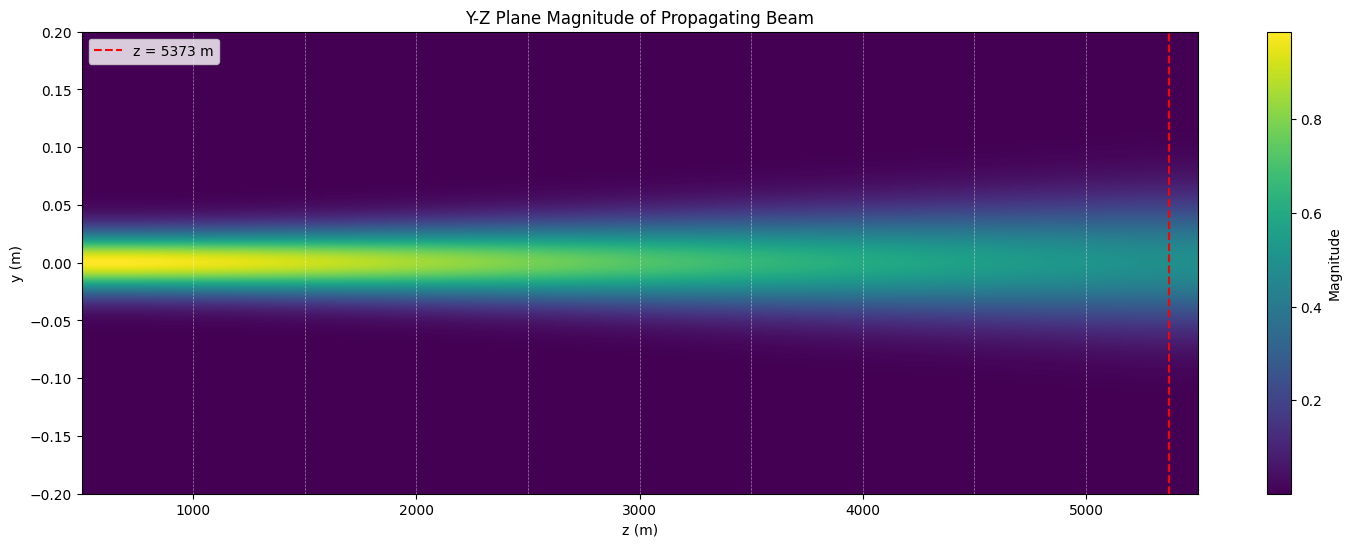

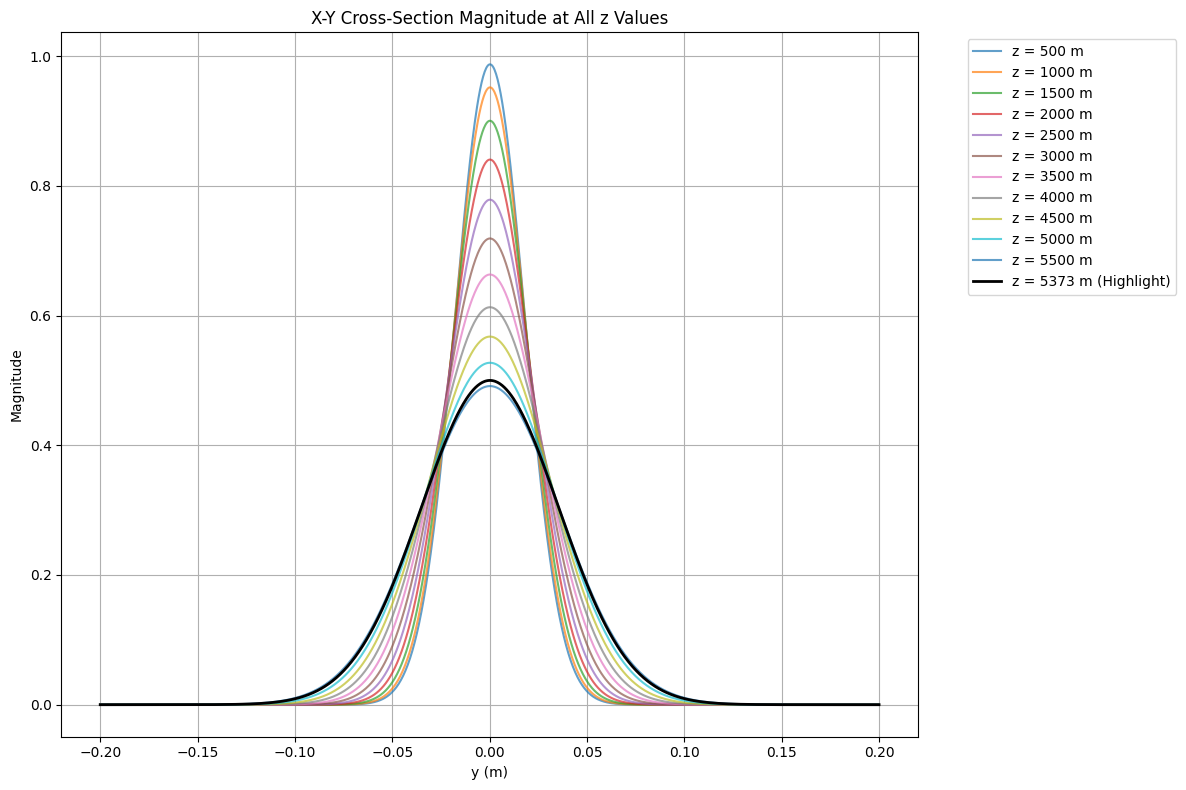

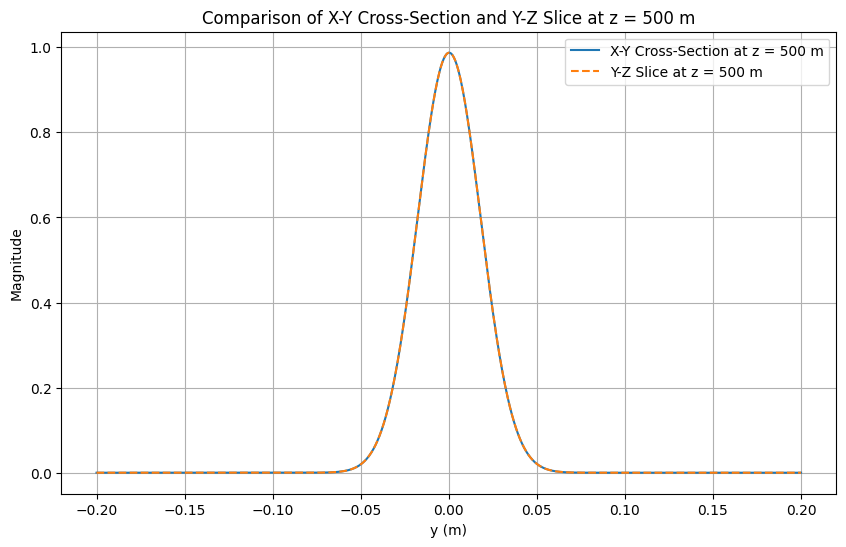

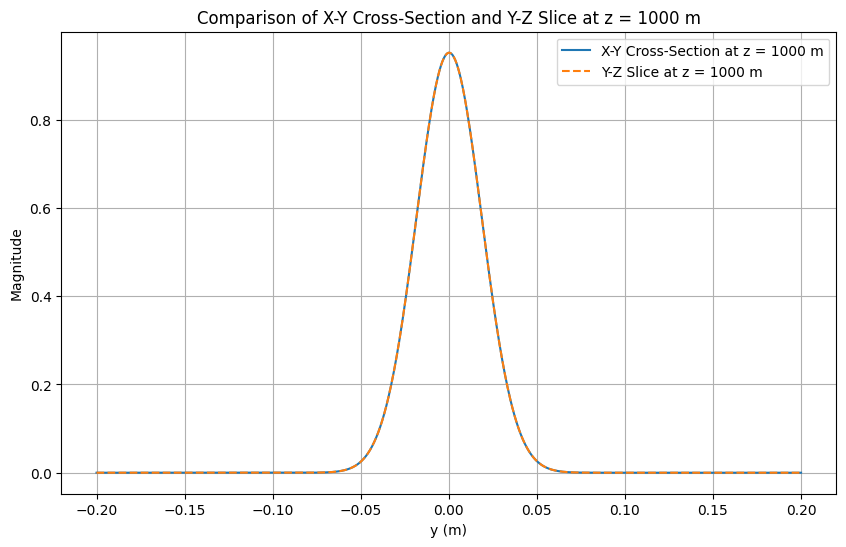

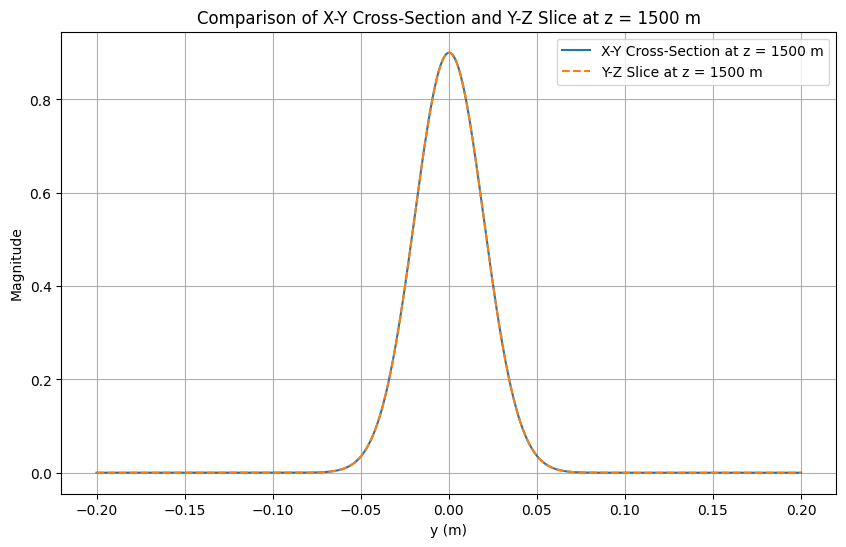

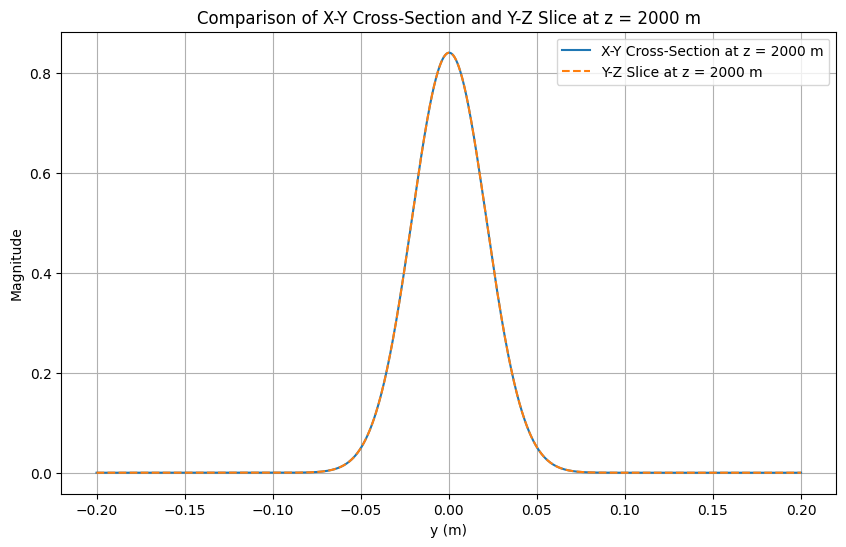

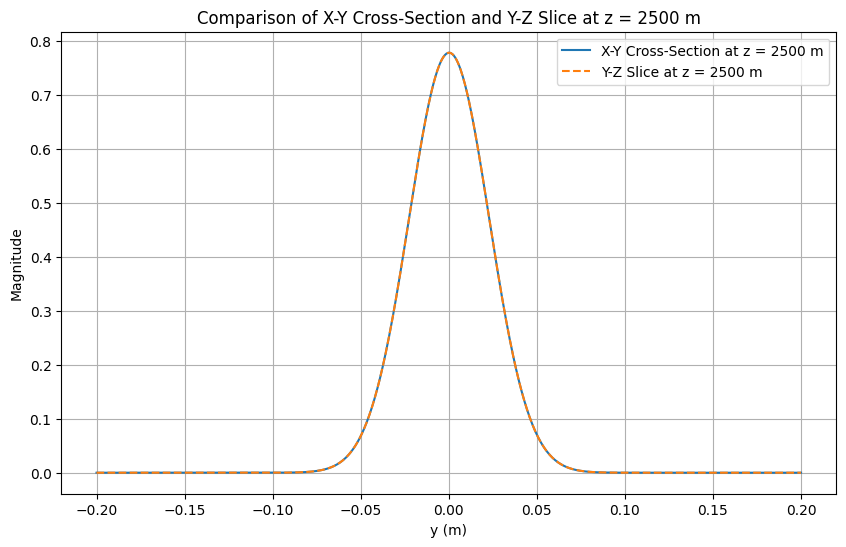

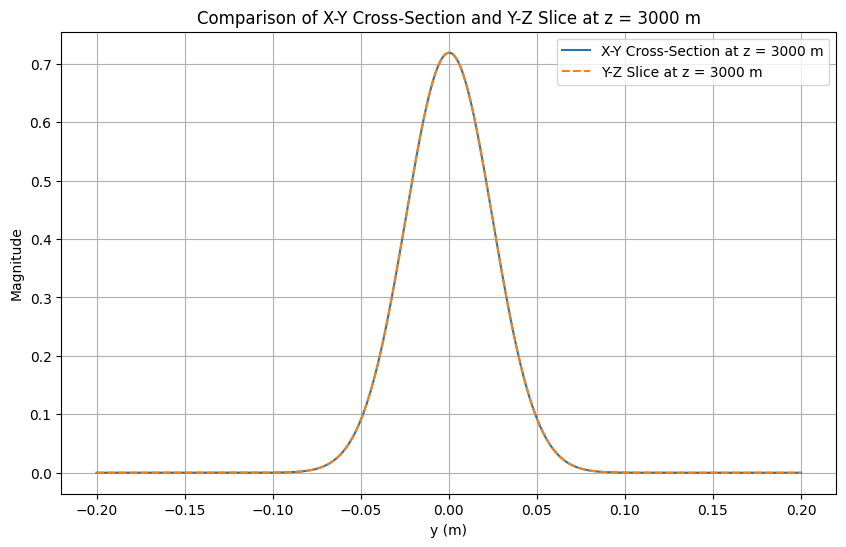

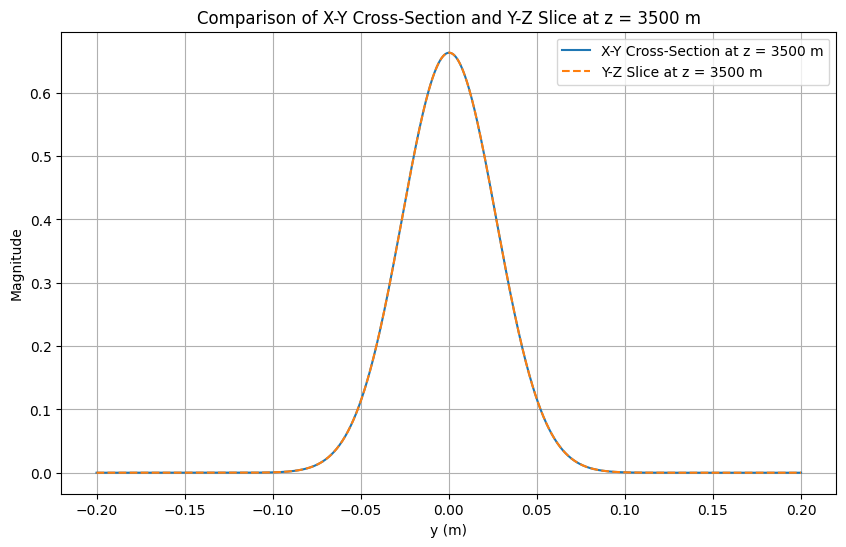

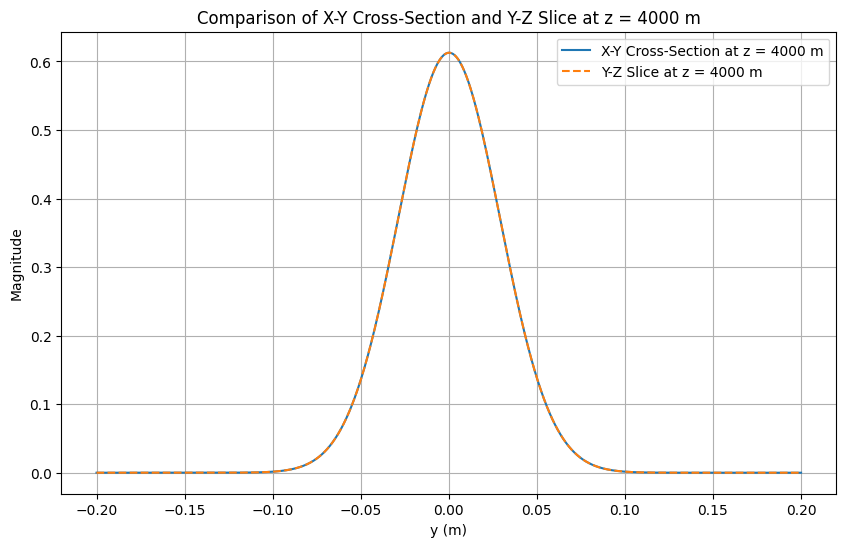

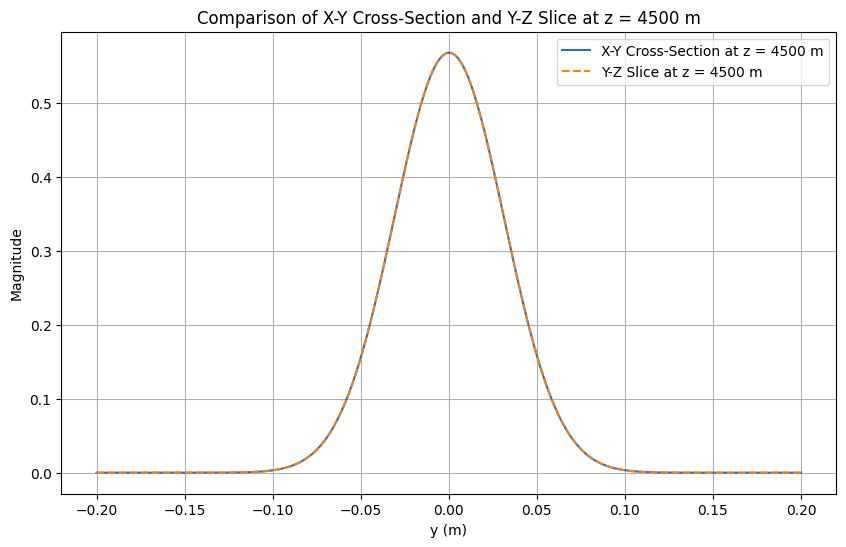

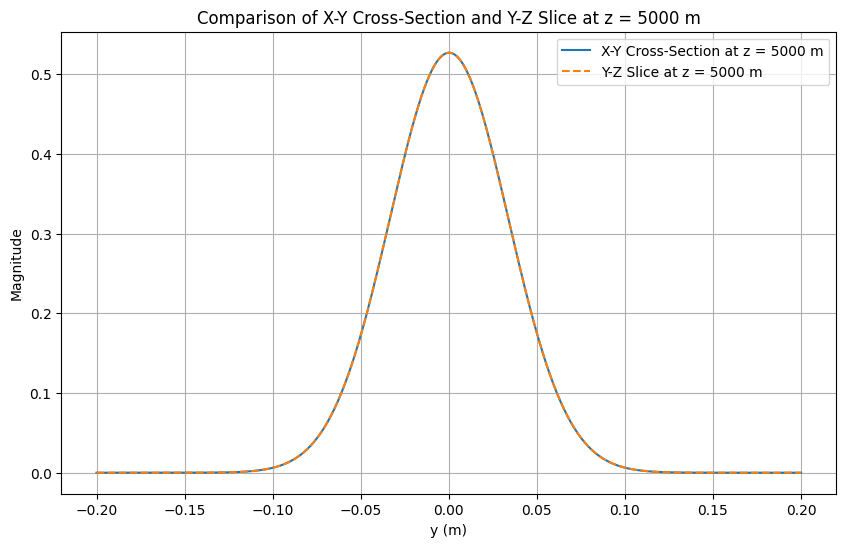

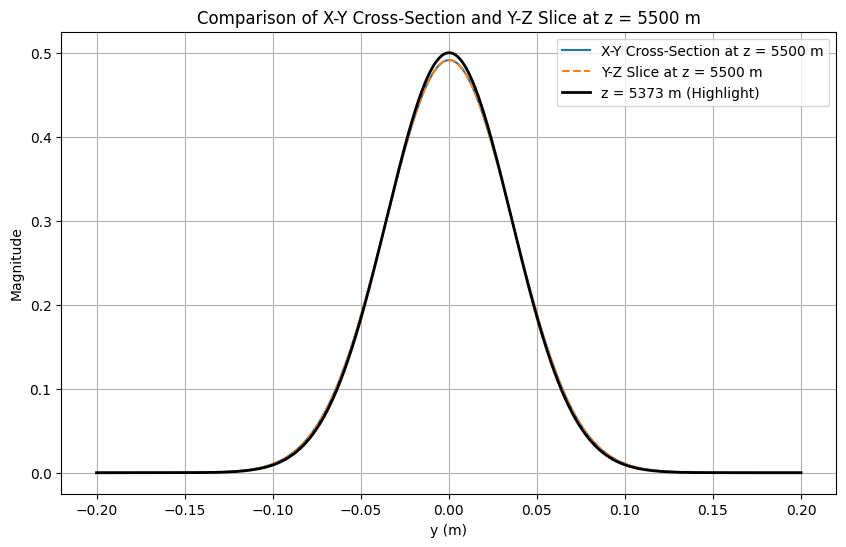

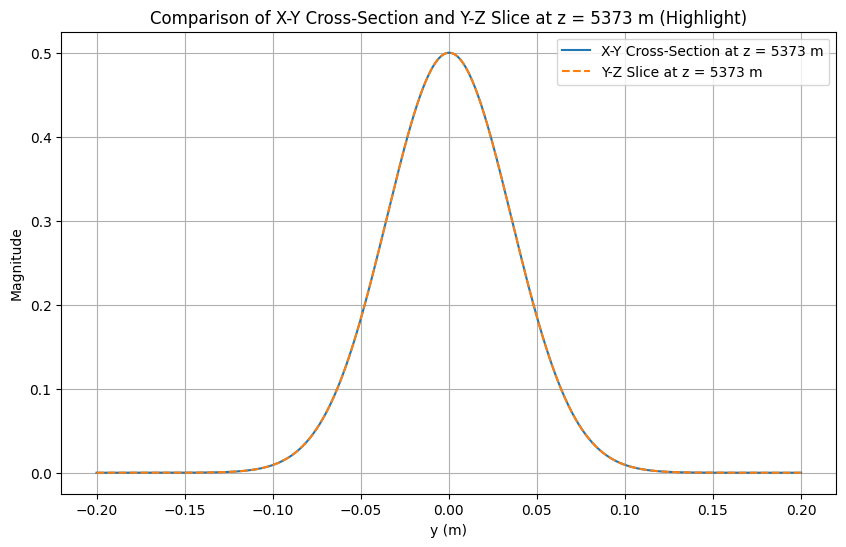

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N):
    """Calculate electric field propagation using angular spectrum method"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(E0)
    U = U0 * H
    E = np.fft.ifft2(U)
    
    mag = np.abs(E)
    return mag, X, Y

def gaussian_beam(xmax, N, w0):
    """Generate initial Gaussian beam field"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    return np.exp(-(X**2 + Y**2) / w0**2)

def compare_xy_cross_section_with_yz_plane_all_z():
    # Parameters (all in SI units)
    xmax = 0.20          # 0.2 m
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    
    # Propagation distances (in meters)
    z_values = np.arange(500, 5501, 500)  # 500 m to 5500 m, step 500 m
    z_highlight = 5373  # 5373 m
    
    # Generate initial field
    E0 = gaussian_beam(xmax, N, w0)
    
    # Arrays to store cross-sections and y-z plane data
    cross_sections = np.zeros((N, len(z_values)))  # Middle column magnitudes
    yz_plane = np.zeros((N, len(z_values)))        # Y-Z plane magnitudes
    
    # Propagate field at each z and extract data
    for i, z in enumerate(z_values):
        mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z, xmax, N)
        middle_column = mag_z[:, N//2]  # Middle column (x = 0)
        cross_sections[:, i] = middle_column
        yz_plane[:, i] = middle_column
    
    # Propagate field at z = 5373 m (highlighted case)
    mag_highlight, X, Y = angular_spectrum_propagation(E0, wavelength, z_highlight, xmax, N)
    xy_cross_section_highlight = mag_highlight[:, N//2]
    
    # Coordinate in meters
    y_coords = np.linspace(-xmax, xmax, N)  # y in meters
    
    # Plot 1: Y-Z plane magnitude with all z values and highlight
    plt.figure(figsize=(18, 6))
    extent = [z_values[0], z_values[-1], -xmax, xmax]  # z in m, y in m
    # plt.imshow() interpolates between the discrete z-values when rendering the image, thats why the rendering seems so well interpolated.
    plt.imshow(yz_plane, aspect='auto', extent=extent, cmap='viridis', origin='lower', interpolation='bilinear')
    for z in z_values:
        plt.axvline(x=z, color='white', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.axvline(x=z_highlight, color='red', linestyle='--', linewidth=1.5, label=f'z = {z_highlight} m')
    plt.colorbar(label='Magnitude')
    plt.title('Y-Z Plane Magnitude of Propagating Beam')
    plt.xlabel('z (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    # Plot 2: X-Y cross-section at all z values + highlighted case
    plt.figure(figsize=(12, 8))
    for i, z in enumerate(z_values):
        xy_cross_section = cross_sections[:, i]
        plt.plot(y_coords, xy_cross_section, label=f'z = {z} m', alpha=0.7)
    plt.plot(y_coords, xy_cross_section_highlight, 'k-', linewidth=2, label=f'z = {z_highlight} m (Highlight)')
    plt.title('X-Y Cross-Section Magnitude at All z Values')
    plt.xlabel('y (m)')
    plt.ylabel('Magnitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Overlay comparison for all z values (raw magnitudes)
    for i, z in enumerate(z_values):
        plt.figure(figsize=(10, 6))
        xy_cross_section = cross_sections[:, i]
        yz_slice = yz_plane[:, i]  # Same as xy_cross_section
        plt.plot(y_coords, xy_cross_section, label=f'X-Y Cross-Section at z = {z} m')
        plt.plot(y_coords, yz_slice, '--', label=f'Y-Z Slice at z = {z} m')
        if z == z_values[-1]:  # Add 5373 m only on the last plot for clarity
            plt.plot(y_coords, xy_cross_section_highlight, 'k-', linewidth=2, label=f'z = {z_highlight} m (Highlight)')
        plt.title(f'Comparison of X-Y Cross-Section and Y-Z Slice at z = {z} m')
        plt.xlabel('y (m)')
        plt.ylabel('Magnitude')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Separate plot for z = 5373 m
    plt.figure(figsize=(10, 6))
    plt.plot(y_coords, xy_cross_section_highlight, label=f'X-Y Cross-Section at z = {z_highlight} m')
    plt.plot(y_coords, xy_cross_section_highlight, '--', label=f'Y-Z Slice at z = {z_highlight} m')
    plt.title(f'Comparison of X-Y Cross-Section and Y-Z Slice at z = {z_highlight} m (Highlight)')
    plt.xlabel('y (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    compare_xy_cross_section_with_yz_plane_all_z()

Question 4 (a),Part II

Output Field Magnitude at z = 20000 m:
  Max Magnitude: 0.153984
  Min Magnitude: 0.001767
Cross-Section (Middle Column) at z = 20000 m:
  Max Raw Magnitude: 0.153984
  Normalized Max Magnitude: 1.000000


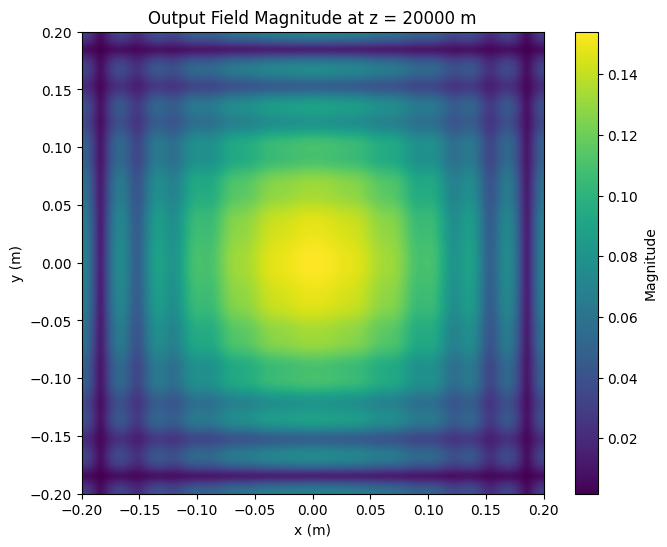

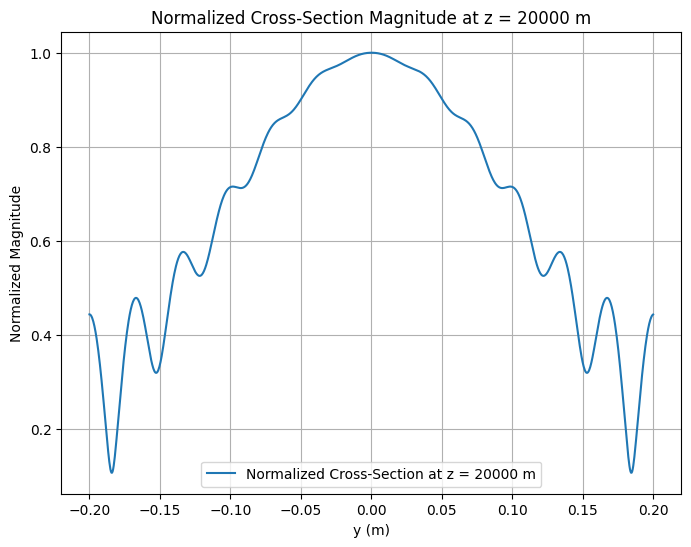

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N):
    """Calculate electric field propagation using angular spectrum method"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(E0)
    U = U0 * H
    E = np.fft.ifft2(U)
    
    mag = np.abs(E)
    return mag, X, Y

def gaussian_beam(xmax, N, w0):
    """Generate initial Gaussian beam field"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    return np.exp(-(X**2 + Y**2) / w0**2)

def propagate_to_20km():
    # Parameters (all in SI units)
    xmax = 0.20          # 0.2 m
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    z_target = 20000     # 20 km = 20000 m
    
    # Generate initial field
    E0 = gaussian_beam(xmax, N, w0)
    
    # Propagate field to z = 20 km
    mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z_target, xmax, N)
    
    # Extract cross-section (middle column, x = 0)
    cross_section = mag_z[:, N//2]
    y_coords = np.linspace(-xmax, xmax, N)  # y in meters
    
    # Normalize cross-section so max magnitude = 1
    cross_section_normalized = cross_section / np.max(cross_section)
    
    # Report output field magnitude and cross-section
    print(f"Output Field Magnitude at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(mag_z):.6f}")
    print(f"  Min Magnitude: {np.min(mag_z):.6f}")
    print(f"Cross-Section (Middle Column) at z = {z_target} m:")
    print(f"  Max Raw Magnitude: {np.max(cross_section):.6f}")
    print(f"  Normalized Max Magnitude: {np.max(cross_section_normalized):.6f}")
    
    # Plot 1: 2D Output Field Magnitude at z = 20 km
    plt.figure(figsize=(8, 6))
    plt.imshow(mag_z, extent=[-xmax, xmax, -xmax, xmax], cmap='viridis')
    plt.colorbar(label='Magnitude')
    plt.title(f'Output Field Magnitude at z = {z_target} m')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.show()
    
    # Plot 2: Normalized Cross-Section at z = 20 km
    plt.figure(figsize=(8, 6))
    plt.plot(y_coords, cross_section_normalized, label=f'Normalized Cross-Section at z = {z_target} m')
    plt.title(f'Normalized Cross-Section Magnitude at z = {z_target} m')
    plt.xlabel('y (m)')
    plt.ylabel('Normalized Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    propagate_to_20km()

In [13]:
## b(ii)

Question 4(B), Part II

Output Field Magnitude at z = 5375 m:
  Max Magnitude: 0.499834
  Min Magnitude: 0.000000
Cross-Section (Middle Column, x = 0) at z = 5375 m:
  Max Magnitude: 0.499834
Cross-Section (Middle Row, y = 0.107455 m) at z = 5375 m:
  Max Magnitude: 0.004928
Centroid Location:
  Simulated: x = -0.000000 m, y = 0.107455 m
  Expected:  x = 0.000000 m, y = 0.107500 m
[[1.54220174e-07 1.54152527e-07 1.53949278e-07 ... 1.53609509e-07
  1.53949278e-07 1.54152527e-07]
 [1.49174889e-07 1.49110717e-07 1.48917897e-07 ... 1.48595529e-07
  1.48917897e-07 1.49110717e-07]
 [1.43938038e-07 1.43877368e-07 1.43695063e-07 ... 1.43390243e-07
  1.43695063e-07 1.43877368e-07]
 ...
 [1.68062262e-07 1.67984317e-07 1.67750163e-07 ... 1.67358851e-07
  1.67750163e-07 1.67984317e-07]
 [1.63677273e-07 1.63602743e-07 1.63378836e-07 ... 1.63004611e-07
  1.63378836e-07 1.63602743e-07]
 [1.59058936e-07 1.58987837e-07 1.58774230e-07 ... 1.58417181e-07
  1.58774230e-07 1.58987837e-07]]


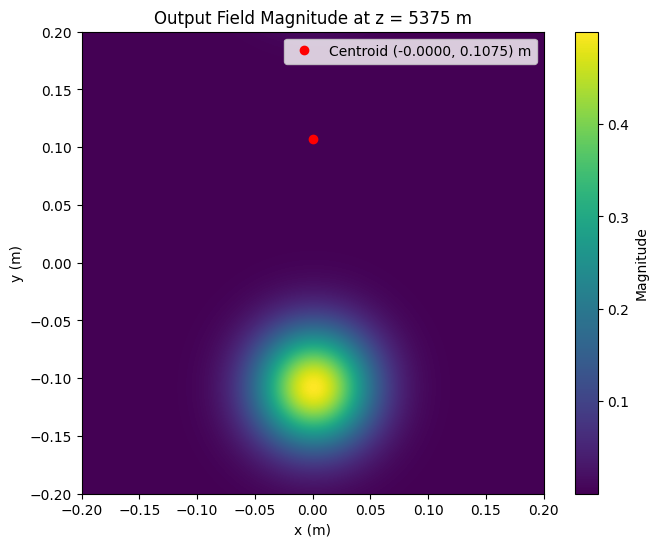

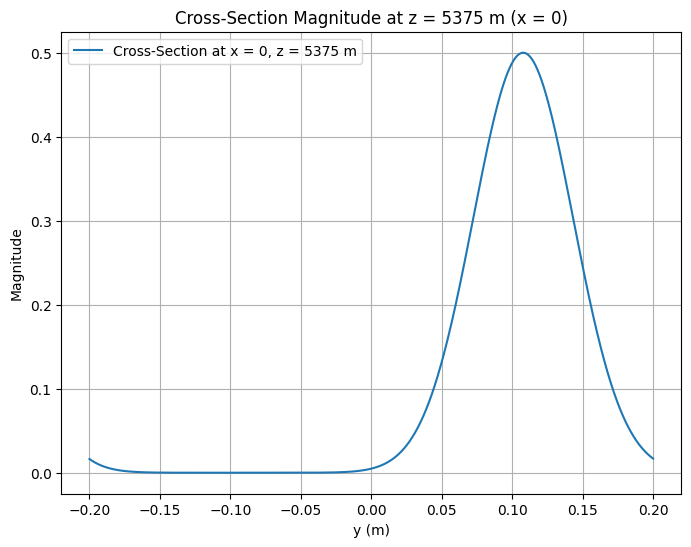

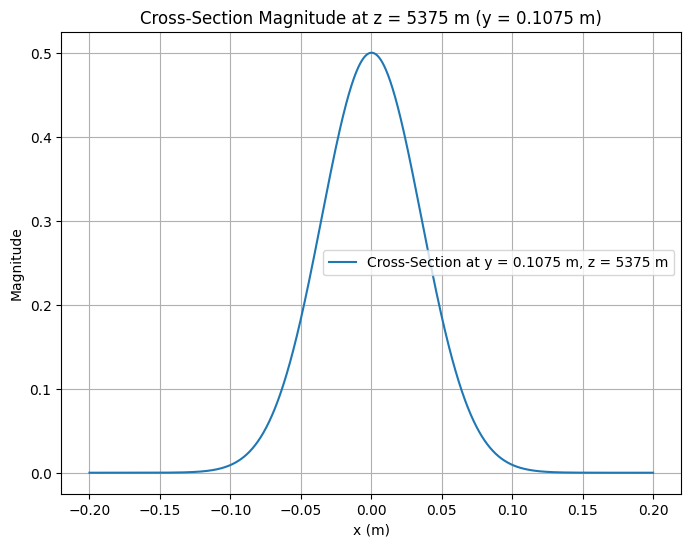

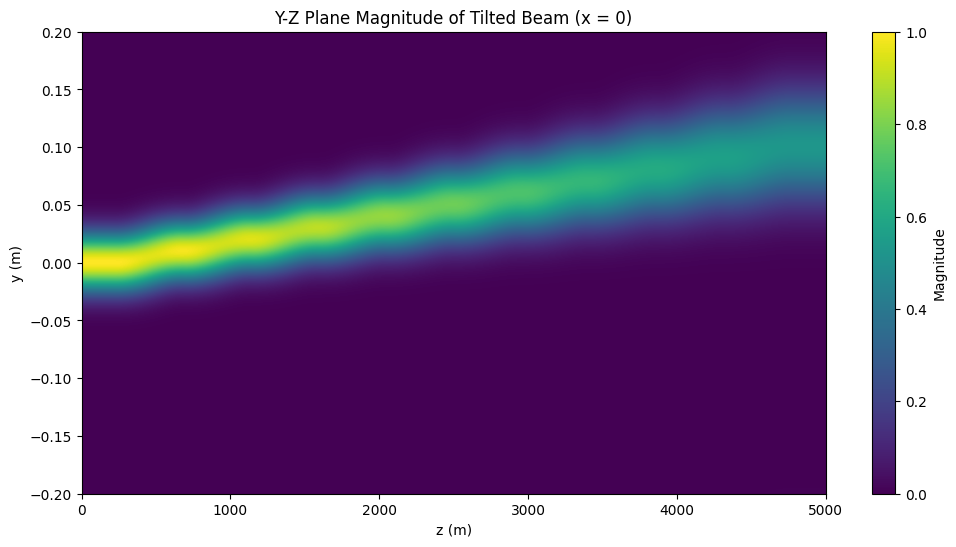

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N):
    """Calculate electric field propagation using angular spectrum method"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(E0)
    U = U0 * H
    E = np.fft.ifft2(U)
    
    mag = np.abs(E)
    return mag, X, Y

def gaussian_beam_with_tilt(xmax, N, w0, theta_y):
    """Generate initial Gaussian beam field with linear phase tilt in y"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    wavelength = 633e-9
    k = 2 * np.pi / wavelength
    ky = k * np.sin(theta_y)  # Linear phase tilt in y-direction (positive theta_y tilts upward)
    phase = ky * Y  # Phase: ky * y (positive ky tilts toward positive y)
    field = np.exp(-(X**2 + Y**2) / w0**2) * np.exp(1j * phase)
    return field

def propagate_tilted_beam_with_yz():
    # Parameters (all in SI units)
    xmax = 0.20          # 0.2 m
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    theta_y = 20e-6      # 20 µrad tilt in positive y-direction
    z_target = 5375      # 5.375 km = 5375 m
    z_values = np.arange(0, z_target + 1, 500)  # 0 to 5375 m, step 500 m
    
    # Generate initial field with tilt in positive y
    E0 = gaussian_beam_with_tilt(xmax, N, w0, theta_y)
    
    # Arrays for y-z plane (middle column magnitudes)
    yz_plane = np.zeros((N, len(z_values)))
    y_coords = np.linspace(-xmax, xmax, N)  # y in meters
    x_coords = np.linspace(-xmax, xmax, N)  # x in meters
    
    # Propagate field and collect y-z data
    for i, z in enumerate(z_values):
        mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z, xmax, N)
        yz_plane[:, i] = mag_z[:, N//2]  # Middle column (x = 0)
    
    # Final field at z = 5.375 km
    mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z_target, xmax, N)
    cross_section_x0 = mag_z[:, N//2]  # At x = 0 (along y)
    cross_section_y_centroid = mag_z[N//2, :]  # At y = centroid (along x)
    
    # Calculate centroid
    intensity = mag_z**2
    x_centroid = np.sum(X * intensity) / np.sum(intensity)
    y_centroid = np.sum(Y * intensity) / np.sum(intensity)
    expected_y_centroid = z_target * theta_y  # Small-angle approximation
    
    # Report output field magnitude and cross-sections
    print(f"Output Field Magnitude at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(mag_z):.6f}")
    print(f"  Min Magnitude: {np.min(mag_z):.6f}")
    print(f"Cross-Section (Middle Column, x = 0) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_x0):.6f}")
    print(f"Cross-Section (Middle Row, y = {y_centroid:.6f} m) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_y_centroid):.6f}")
    print(f"Centroid Location:")
    print(f"  Simulated: x = {x_centroid:.6f} m, y = {y_centroid:.6f} m")
    print(f"  Expected:  x = 0.000000 m, y = {expected_y_centroid:.6f} m")
    
    print(mag_z)
    # Plot 1: 2D Output Field Magnitude at z = 5.375 km
    plt.figure(figsize=(8, 6))
    plt.imshow(mag_z, extent=[-xmax, xmax, -xmax, xmax], cmap='viridis')
    plt.plot(x_centroid, y_centroid, 'ro', label=f'Centroid ({x_centroid:.4f}, {y_centroid:.4f}) m')
    plt.colorbar(label='Magnitude')
    plt.title(f'Output Field Magnitude at z = {z_target} m')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    # Plot 2: Cross-Section at x = 0 (along y)
    plt.figure(figsize=(8, 6))
    plt.plot(y_coords, cross_section_x0, label=f'Cross-Section at x = 0, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (x = 0)')
    plt.xlabel('y (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 3: Cross-Section at y = centroid (along x)
    plt.figure(figsize=(8, 6))
    # Find the index closest to y_centroid for plotting
    y_idx = np.argmin(np.abs(y_coords - y_centroid))
    cross_section_x = mag_z[y_idx, :]
    plt.plot(x_coords, cross_section_x, label=f'Cross-Section at y = {y_centroid:.4f} m, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (y = {y_centroid:.4f} m)')
    plt.xlabel('x (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 4: Y-Z Plane Magnitude
    plt.figure(figsize=(12, 6))
    extent = [z_values[0], z_values[-1], -xmax, xmax]  # z in m, y in m
    plt.imshow(yz_plane, aspect='auto', extent=extent, cmap='viridis', origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title('Y-Z Plane Magnitude of Tilted Beam (x = 0)')
    plt.xlabel('z (m)')
    plt.ylabel('y (m)')
    plt.show()

if __name__ == "__main__":
    propagate_tilted_beam_with_yz()

Output Field Magnitude at z = 5375 m:
  Max Magnitude: 0.499829
  Min Magnitude: 0.000000
Cross-Section (Middle Column, x = 0) at z = 5375 m:
  Max Magnitude: 0.499829
Cross-Section (Middle Row, y = -0.077500 m) at z = 5375 m:
  Max Magnitude: 0.045302
Centroid Location:
  Simulated: x = -0.000000 m, y = -0.077500 m
  Expected:  x = 0.000000 m, y = 0.322500 m


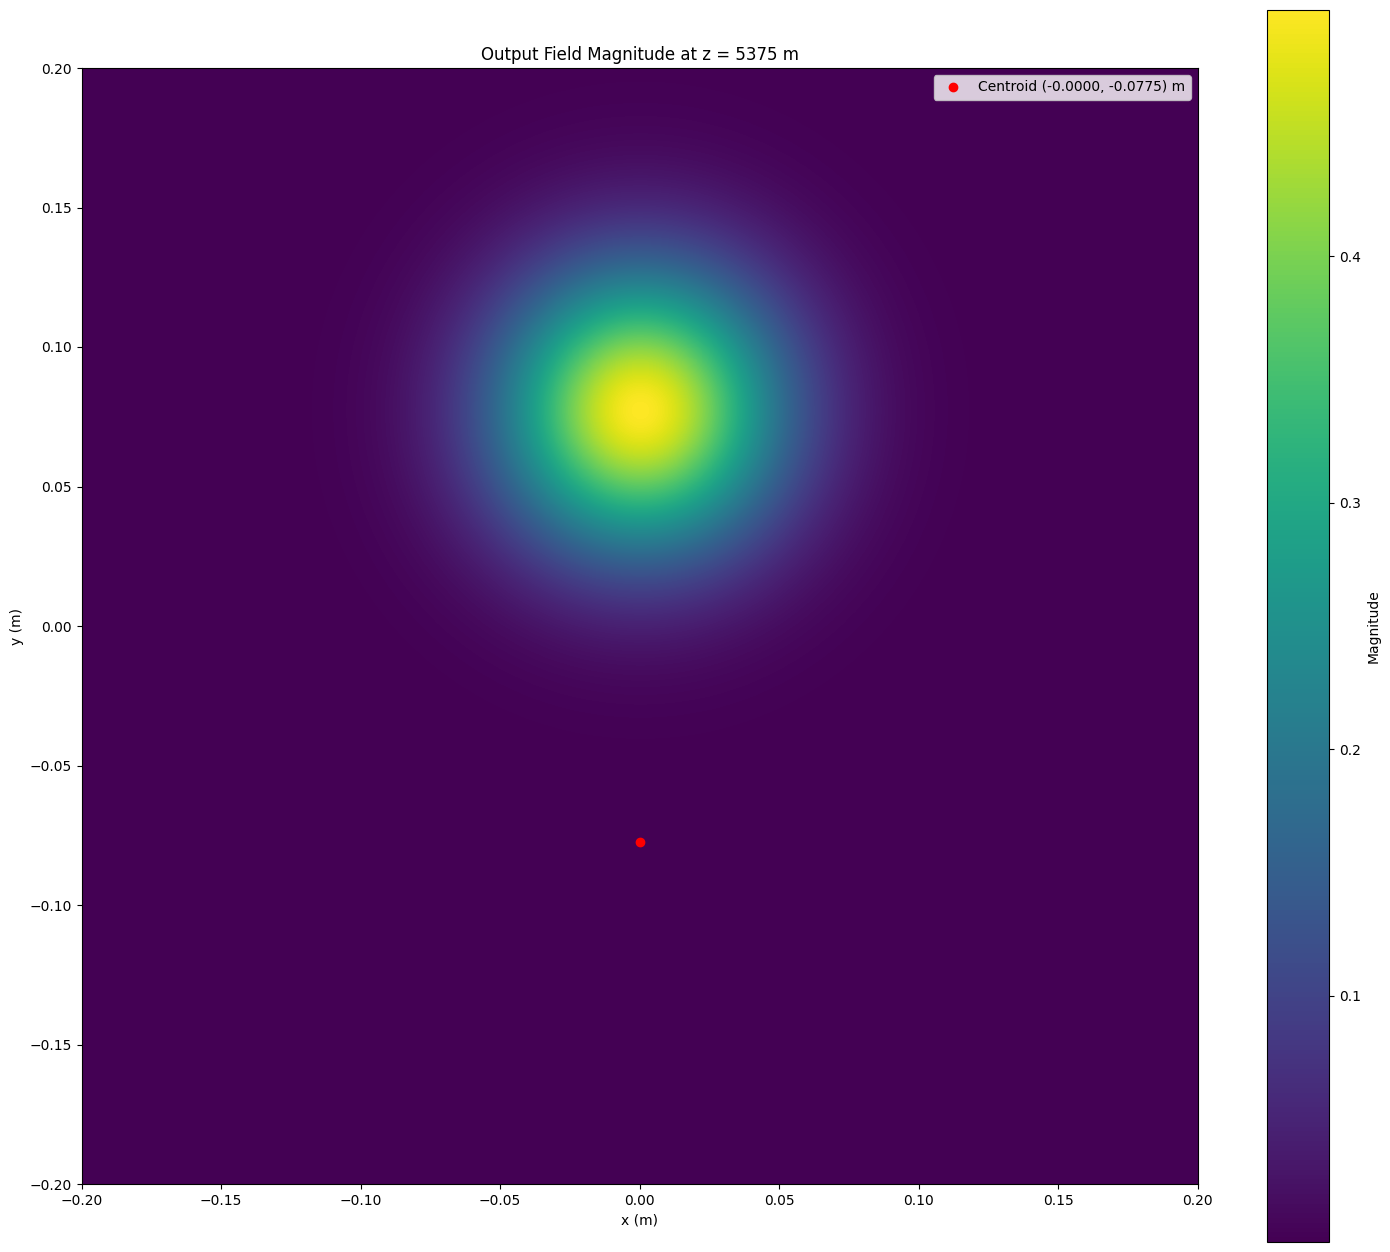

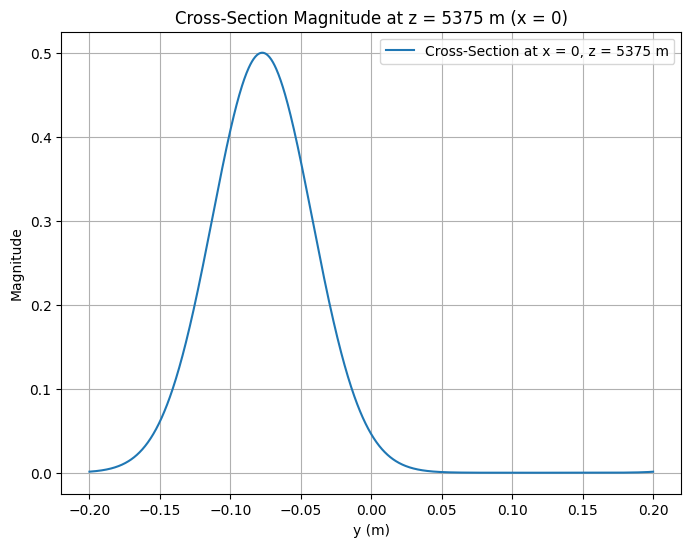

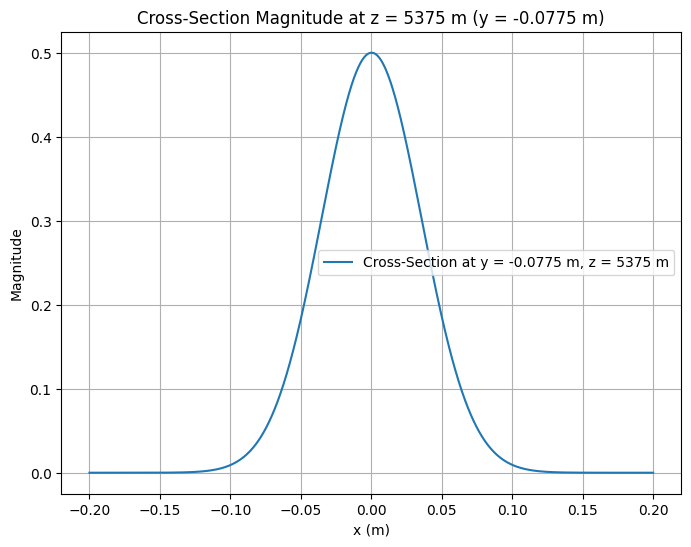

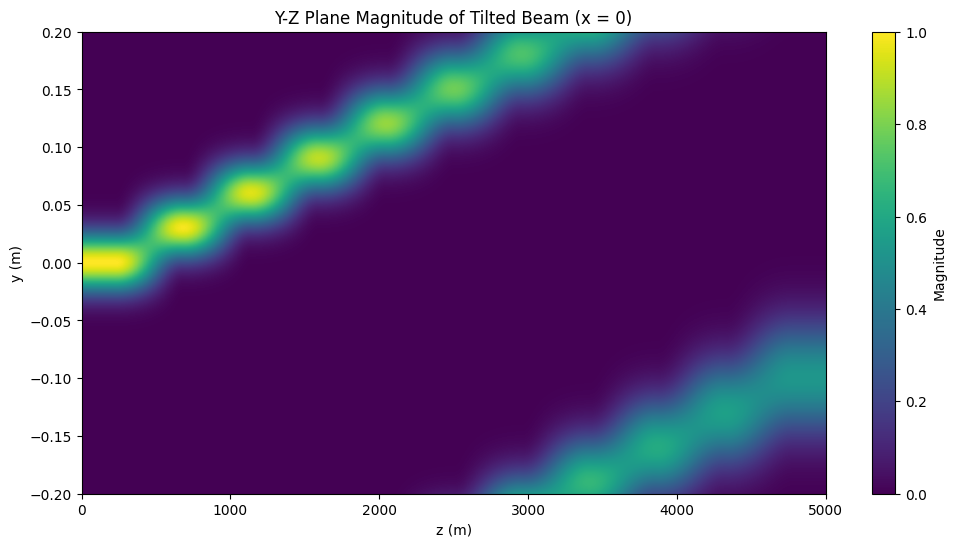

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N):
    """Calculate electric field propagation using angular spectrum method"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(E0)
    U = U0 * H
    E = np.fft.ifft2(U)
    
    mag = np.abs(E)
    return mag, X, Y

def gaussian_beam_with_tilt(xmax, N, w0, theta_y):
    """Generate initial Gaussian beam field with linear phase tilt in y"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    wavelength = 633e-9
    k = 2 * np.pi / wavelength
    ky = k * np.sin(theta_y)  # Linear phase tilt in y-direction (positive theta_y tilts upward)
    phase = ky * Y  # Phase: ky * y (positive ky tilts toward positive y)
    field = np.exp(-(X**2 + Y**2) / w0**2) * np.exp(1j * phase)
    return field

def propagate_tilted_beam_with_yz():
    # Parameters (all in SI units)
    xmax = 0.20          # 0.2 m
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    theta_y = 60e-6      # 20 µrad tilt in positive y-direction
    z_target = 5375      # 5.375 km = 5375 m
    z_values = np.arange(0, z_target + 1, 500)  # 0 to 5375 m, step 500 m
    
    # Generate initial field with tilt in positive y
    E0 = gaussian_beam_with_tilt(xmax, N, w0, theta_y)
    
    # Arrays for y-z plane (middle column magnitudes)
    yz_plane = np.zeros((N, len(z_values)))
    y_coords = np.linspace(-xmax, xmax, N)  # y in meters
    x_coords = np.linspace(-xmax, xmax, N)  # x in meters
    
    # Propagate field and collect y-z data
    for i, z in enumerate(z_values):
        mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z, xmax, N)
        yz_plane[:, i] = mag_z[:, N//2]  # Middle column (x = 0)
    
    # Final field at z = 5.375 km
    mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z_target, xmax, N)
    cross_section_x0 = mag_z[:, N//2]  # At x = 0 (along y)
    cross_section_y_centroid = mag_z[N//2, :]  # At y = centroid (along x)
    
    # Calculate centroid
    intensity = mag_z**2
    x_centroid = np.sum(X * intensity) / np.sum(intensity)
    y_centroid = np.sum(Y * intensity) / np.sum(intensity)
    expected_y_centroid = z_target * theta_y  # Small-angle approximation
    
    # Report output field magnitude and cross-sections
    print(f"Output Field Magnitude at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(mag_z):.6f}")
    print(f"  Min Magnitude: {np.min(mag_z):.6f}")
    print(f"Cross-Section (Middle Column, x = 0) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_x0):.6f}")
    print(f"Cross-Section (Middle Row, y = {y_centroid:.6f} m) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_y_centroid):.6f}")
    print(f"Centroid Location:")
    print(f"  Simulated: x = {x_centroid:.6f} m, y = {y_centroid:.6f} m")
    print(f"  Expected:  x = 0.000000 m, y = {expected_y_centroid:.6f} m")
    
    # Plot 1: 2D Output Field Magnitude at z = 5.375 km
    plt.figure(figsize=(18, 16))
    plt.imshow(mag_z, extent=[-xmax, xmax, -xmax, xmax], cmap='viridis')
    plt.plot(x_centroid, y_centroid, 'ro', label=f'Centroid ({x_centroid:.4f}, {y_centroid:.4f}) m')
    plt.colorbar(label='Magnitude')
    plt.title(f'Output Field Magnitude at z = {z_target} m')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    # Plot 2: Cross-Section at x = 0 (along y)
    plt.figure(figsize=(8, 6))
    plt.plot(y_coords, cross_section_x0, label=f'Cross-Section at x = 0, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (x = 0)')
    plt.xlabel('y (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 3: Cross-Section at y = centroid (along x)
    plt.figure(figsize=(8, 6))
    # Find the index closest to y_centroid for plotting
    y_idx = np.argmin(np.abs(y_coords - y_centroid))
    cross_section_x = mag_z[y_idx, :]
    plt.plot(x_coords, cross_section_x, label=f'Cross-Section at y = {y_centroid:.4f} m, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (y = {y_centroid:.4f} m)')
    plt.xlabel('x (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 4: Y-Z Plane Magnitude
    plt.figure(figsize=(12, 6))
    extent = [z_values[0], z_values[-1], -xmax, xmax]  # z in m, y in m
    plt.imshow(yz_plane, aspect='auto', extent=extent, cmap='viridis', origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title('Y-Z Plane Magnitude of Tilted Beam (x = 0)')
    plt.xlabel('z (m)')
    plt.ylabel('y (m)')
    plt.show()

if __name__ == "__main__":
    propagate_tilted_beam_with_yz()

Question 4 (C)

padded extra 0.2 m per side 
Output Field Magnitude at z = 5375 m (with 512 pixels = 0.200 m padding):
  Max Magnitude: 0.001194
  Min Magnitude: 0.000000
Cross-Section (Middle Column, x = 0) at z = 5375 m:
  Max Magnitude: 0.001194
Cross-Section (Middle Row, y = 0.195058 m) at z = 5375 m:
  Max Magnitude: 0.000000
Centroid Location:
  Simulated: x = -0.000000 m, y = 0.195058 m
  Expected:  x = 0.000000 m, y = 0.322500 m


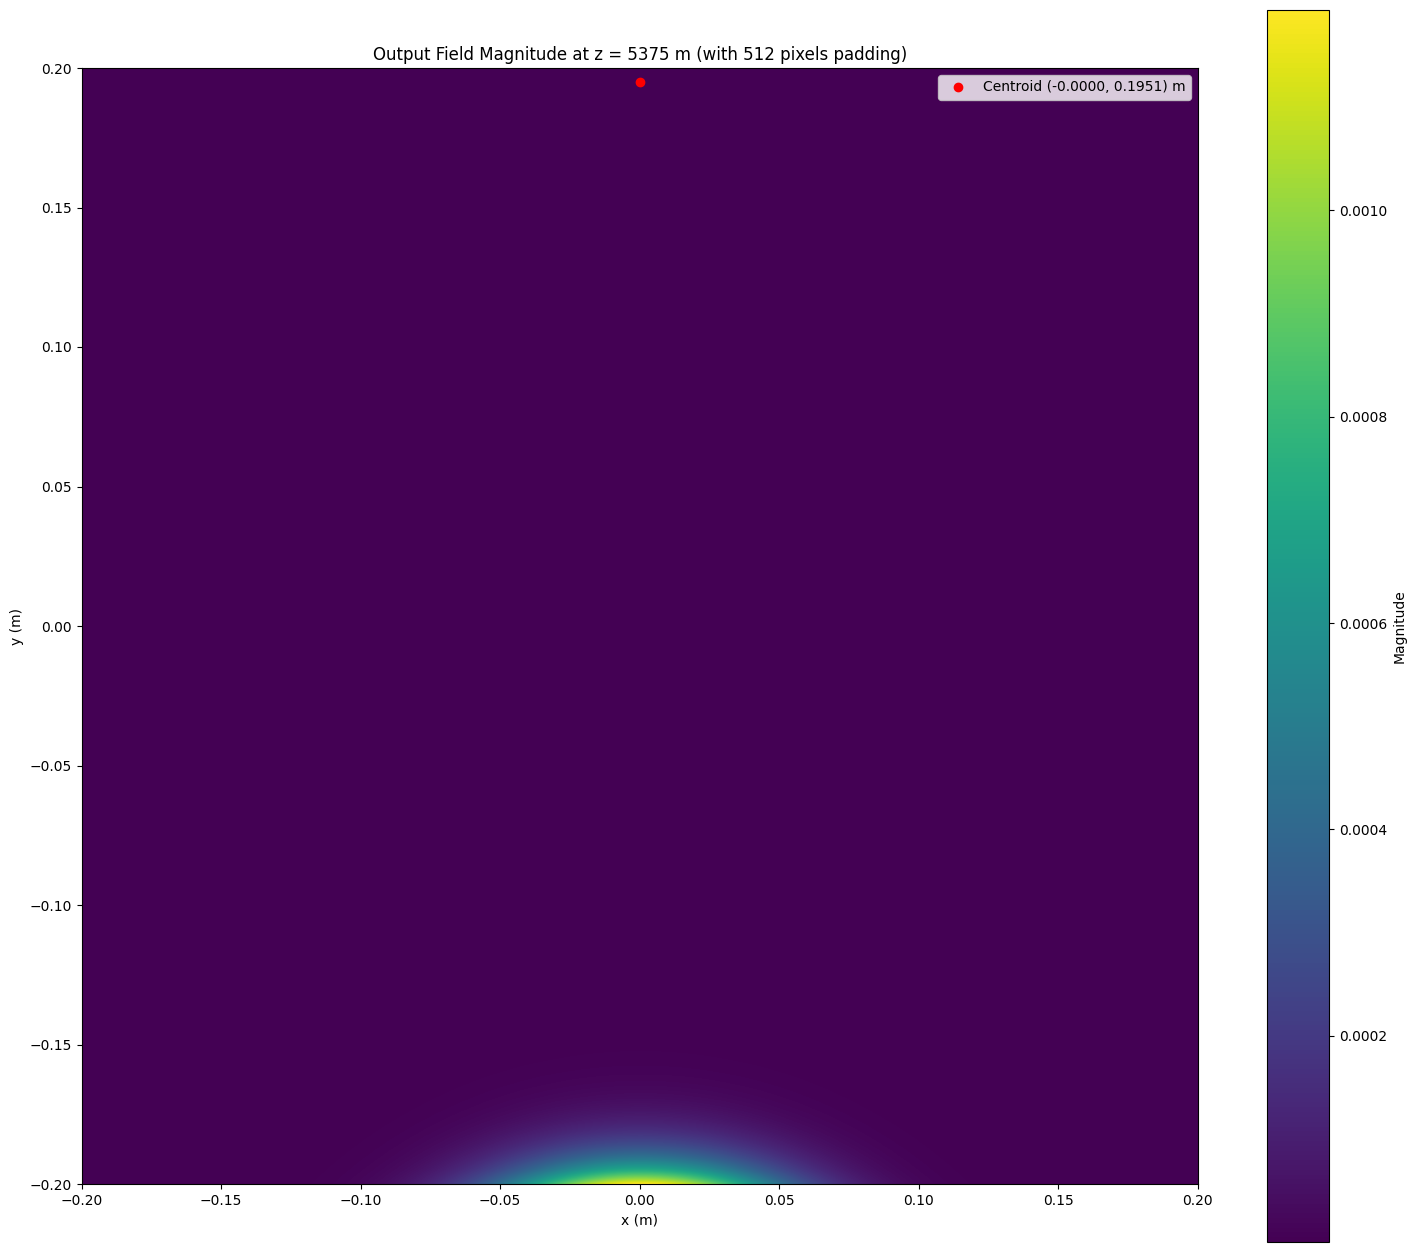

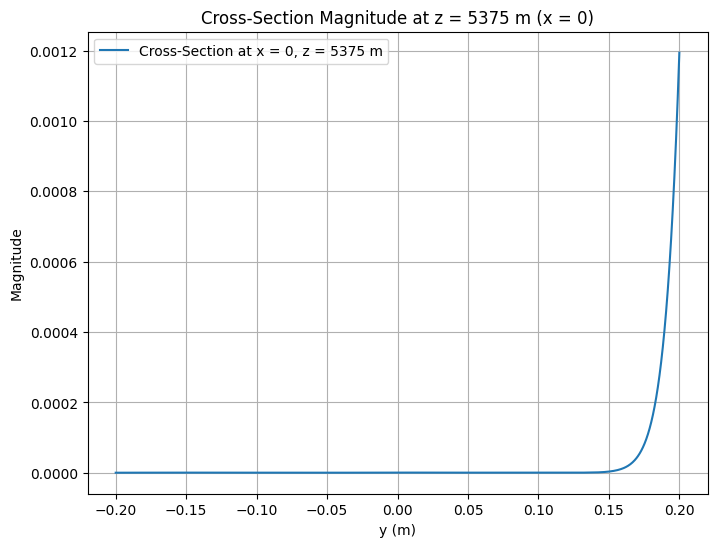

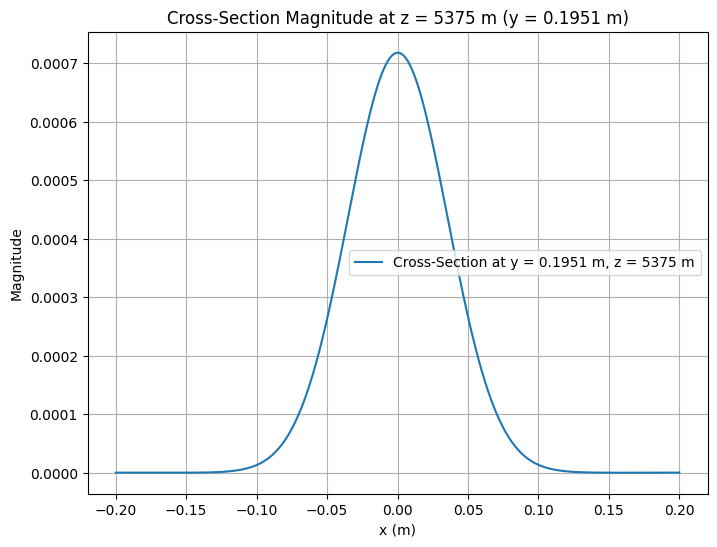

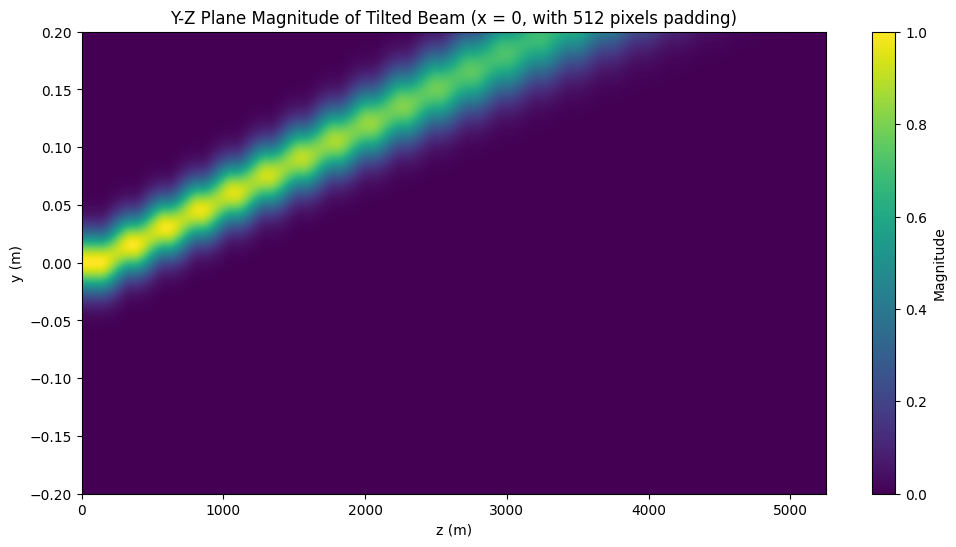

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N, padding_pixels=0):
    """Calculate electric field propagation using angular spectrum method with optional padding"""
    # If padding is requested, extend the field
    if padding_pixels > 0:
        N_padded = N + 2 * padding_pixels
        E0_padded = np.zeros((N_padded, N_padded), dtype=complex)
        start_idx = padding_pixels
        end_idx = padding_pixels + N
        E0_padded[start_idx:end_idx, start_idx:end_idx] = E0
        input_field = E0_padded
        total_N = N_padded
        total_xmax = xmax * (N_padded / N)  # Adjust domain size proportionally
    else:
        input_field = E0
        total_N = N
        total_xmax = xmax
    
    # Propagation
    dx = 2 * total_xmax / total_N
    x = np.linspace(-total_xmax, total_xmax, total_N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(total_N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(input_field)
    U = U0 * H
    E = np.fft.ifft2(U)
    mag = np.abs(E)
    
    # Remove padding from the output if it was applied
    if padding_pixels > 0:
        mag = mag[start_idx:end_idx, start_idx:end_idx]
        X = X[start_idx:end_idx, start_idx:end_idx]
        Y = Y[start_idx:end_idx, start_idx:end_idx]
    
    return mag, X, Y

def gaussian_beam_with_tilt(xmax, N, w0, theta_y):
    """Generate initial Gaussian beam field with linear phase tilt in y"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    wavelength = 633e-9
    k = 2 * np.pi / wavelength
    ky = k * np.sin(theta_y)
    phase = ky * Y
    field = np.exp(-(X**2 + Y**2) / w0**2) * np.exp(1j * phase)
    return field

def propagate_tilted_beam_with_yz(padding_pixels=0):
    # Parameters (all in SI units)
    xmax = 0.20          # Original domain: -0.2 m to 0.2 m
    N = 1024             # Original pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    theta_y = 60e-6      # 60 µrad tilt
    z_target = 5375      # 5.375 km
    z_values = np.arange(0, z_target + 1, 250)  # 0 to 5375 m, step 500 m
    
    # Generate initial field
    E0 = gaussian_beam_with_tilt(xmax, N, w0, theta_y)
    
    # Arrays for y-z plane (original size)
    yz_plane = np.zeros((N, len(z_values)))
    y_coords = np.linspace(-xmax, xmax, N)  # y in meters
    x_coords = np.linspace(-xmax, xmax, N)  # x in meters
    
    # Propagate field and collect y-z data
    for i, z in enumerate(z_values):
        mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z, xmax, N, padding_pixels)
        yz_plane[:, i] = mag_z[:, N//2]  # Middle column (x = 0)
    
    # Final field at z = 5.375 km
    mag_z, X, Y = angular_spectrum_propagation(E0, wavelength, z_target, xmax, N, padding_pixels)
    cross_section_x0 = mag_z[:, N//2]  # At x = 0 (along y)
    cross_section_y_centroid = mag_z[N//2, :]  # At y = centroid (along x)
    
    # Calculate centroid
    intensity = mag_z**2
    x_centroid = np.sum(X * intensity) / np.sum(intensity)
    y_centroid = np.sum(Y * intensity) / np.sum(intensity)
    expected_y_centroid = z_target * theta_y  # Small-angle approximation
    
    # Report output
    padding_m = padding_pixels * (2 * xmax / N)  # Convert pixels to meters
    print(f"Output Field Magnitude at z = {z_target} m (with {padding_pixels} pixels = {padding_m:.3f} m padding):")
    print(f"  Max Magnitude: {np.max(mag_z):.6f}")
    print(f"  Min Magnitude: {np.min(mag_z):.6f}")
    print(f"Cross-Section (Middle Column, x = 0) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_x0):.6f}")
    print(f"Cross-Section (Middle Row, y = {y_centroid:.6f} m) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(cross_section_y_centroid):.6f}")
    print(f"Centroid Location:")
    print(f"  Simulated: x = {x_centroid:.6f} m, y = {y_centroid:.6f} m")
    print(f"  Expected:  x = 0.000000 m, y = {expected_y_centroid:.6f} m")
    
    # Plot 1: 2D Output Field Magnitude at z = 5.375 km
    plt.figure(figsize=(18, 16))
    plt.imshow(mag_z, extent=[-xmax, xmax, -xmax, xmax], cmap='viridis')
    plt.plot(x_centroid, y_centroid, 'ro', label=f'Centroid ({x_centroid:.4f}, {y_centroid:.4f}) m')
    plt.colorbar(label='Magnitude')
    plt.title(f'Output Field Magnitude at z = {z_target} m (with {padding_pixels} pixels padding)')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.show()
    
    # Plot 2: Cross-Section at x = 0 (along y)
    plt.figure(figsize=(8, 6))
    plt.plot(y_coords, cross_section_x0, label=f'Cross-Section at x = 0, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (x = 0)')
    plt.xlabel('y (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 3: Cross-Section at y = centroid (along x)
    plt.figure(figsize=(8, 6))
    y_idx = np.argmin(np.abs(y_coords - y_centroid))
    cross_section_x = mag_z[y_idx, :]
    plt.plot(x_coords, cross_section_x, label=f'Cross-Section at y = {y_centroid:.4f} m, z = {z_target} m')
    plt.title(f'Cross-Section Magnitude at z = {z_target} m (y = {y_centroid:.4f} m)')
    plt.xlabel('x (m)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot 4: Y-Z Plane Magnitude
    plt.figure(figsize=(12, 6))
    extent = [z_values[0], z_values[-1], -xmax, xmax]  # z in m, y in m
    plt.imshow(yz_plane, aspect='auto', extent=extent, cmap='viridis', origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title(f'Y-Z Plane Magnitude of Tilted Beam (x = 0, with {padding_pixels} pixels padding)')
    plt.xlabel('z (m)')
    plt.ylabel('y (m)')
    plt.show()

if __name__ == "__main__":
    # Example with 256 pixels padding (approx 0.1 m per side with dx = 0.4m/1024)
    dx = 0.4/1024 # per meter 0.0004m per pixel
    desire_padding_distance_in_pixel_per_side  = 256 * 2
    padding_distance_per_side= dx * desire_padding_distance_in_pixel_per_side
    print(f'padded extra {padding_distance_per_side} m per side ')
    propagate_tilted_beam_with_yz(padding_pixels=desire_padding_distance_in_pixel_per_side)

In [50]:
#travel 20km

Question 4 (D)

Padded extra 0.200 m per side (512 pixels)
Padding: 512 pixels = 0.200 m per side
Padded Field (before cropping) at z = 20000 m:
  Max Magnitude: 0.153262
  Min Magnitude: 0.000000
Cropped Field (after cropping) at z = 20000 m:
  Max Magnitude: 0.153262
  Min Magnitude: 0.007580


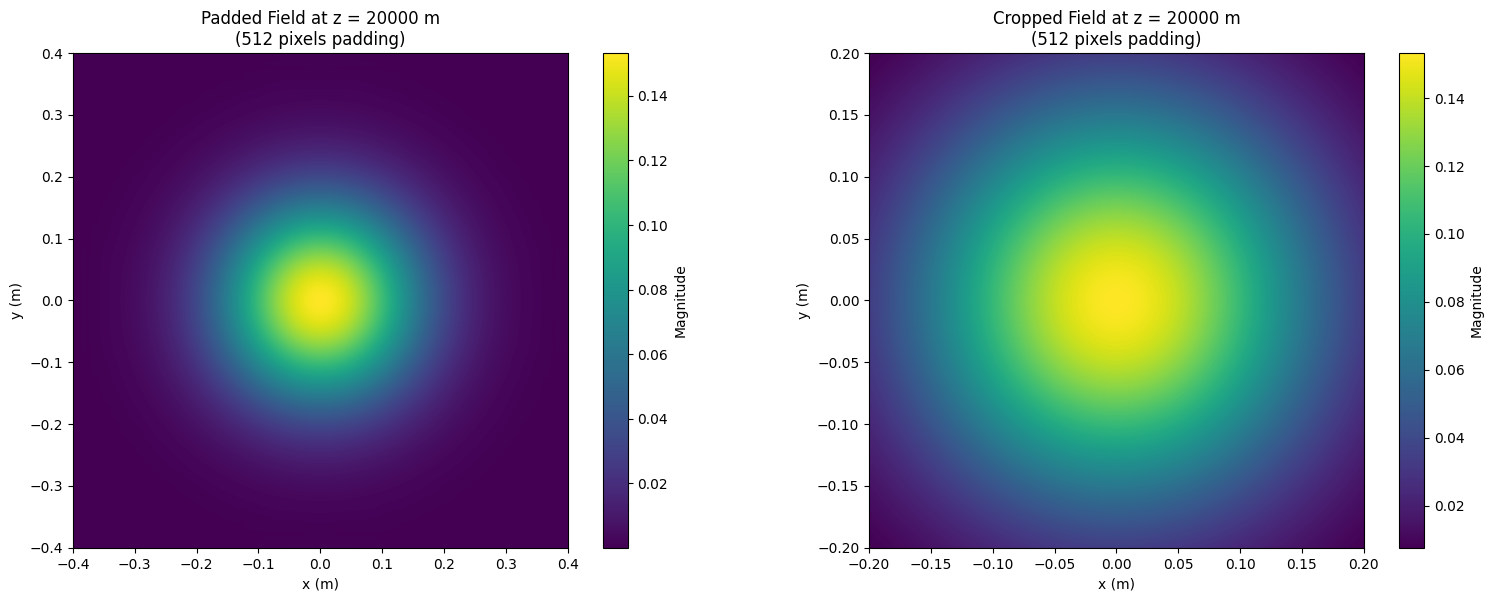

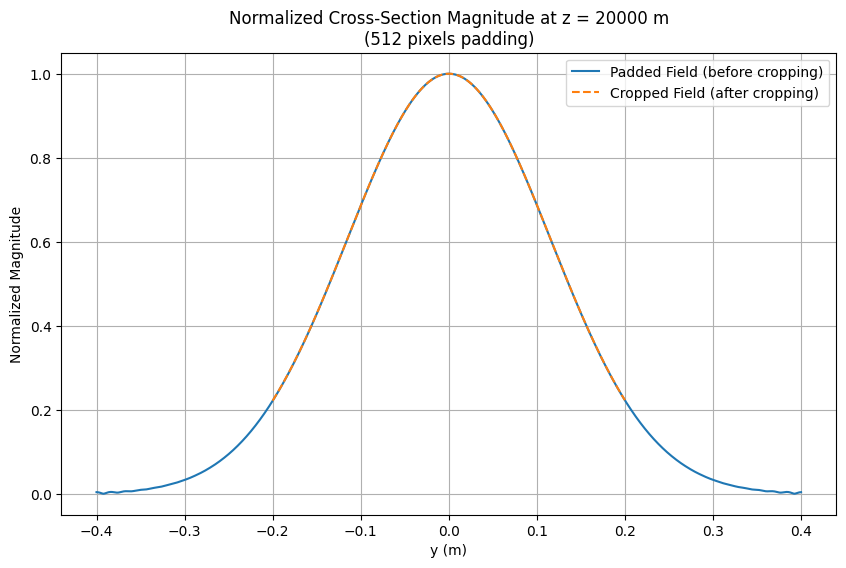

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def angular_spectrum_propagation(E0, wavelength, z, xmax, N, padding_pixels=0):
    """Calculate electric field propagation with optional padding, returning both padded and cropped fields"""
    # If padding is requested, extend the field
    if padding_pixels > 0:
        N_padded = N + 2 * padding_pixels
        E0_padded = np.zeros((N_padded, N_padded), dtype=complex)
        start_idx = padding_pixels
        end_idx = padding_pixels + N
        E0_padded[start_idx:end_idx, start_idx:end_idx] = E0
        input_field = E0_padded
        total_N = N_padded
        total_xmax = xmax * (N_padded / N)  # Adjust domain size proportionally
    else:
        input_field = E0
        total_N = N
        total_xmax = xmax
    
    # Propagation
    dx = 2 * total_xmax / total_N
    x = np.linspace(-total_xmax, total_xmax, total_N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    
    k = 2 * np.pi / wavelength
    fx = np.fft.fftfreq(total_N, dx)
    FX, FY = np.meshgrid(fx, fx)
    
    kx = 2 * np.pi * FX
    ky = 2 * np.pi * FY
    kz = np.sqrt(k**2 - kx**2 - ky**2)
    H = np.exp(1j * kz * z)
    H[np.isnan(kz) | (kx**2 + ky**2 > k**2)] = 0
    
    U0 = np.fft.fft2(input_field)
    U = U0 * H
    E = np.fft.ifft2(U)
    mag_padded = np.abs(E)  # Full padded field
    
    # Coordinates for padded field
    X_padded = X
    Y_padded = Y
    
    # Remove padding from the output if it was applied
    if padding_pixels > 0:
        mag_cropped = mag_padded[start_idx:end_idx, start_idx:end_idx]
        X_cropped = X[start_idx:end_idx, start_idx:end_idx]
        Y_cropped = Y[start_idx:end_idx, start_idx:end_idx]
    else:
        mag_cropped = mag_padded
        X_cropped = X
        Y_cropped = Y
    
    return (mag_padded, X_padded, Y_padded), (mag_cropped, X_cropped, Y_cropped)

def gaussian_beam(xmax, N, w0):
    """Generate initial Gaussian beam field"""
    dx = 2 * xmax / N
    x = np.linspace(-xmax, xmax, N, endpoint=False)
    X, Y = np.meshgrid(x, x)
    return np.exp(-(X**2 + Y**2) / w0**2)

def propagate_to_20km(padding_pixels=0):
    # Parameters (all in SI units)
    xmax = 0.20          # 0.2 m
    N = 1024             # pixels per side
    wavelength = 633e-9  # 633e-9 m
    w0 = 0.025           # 0.025 m
    z_target = 20000     # 20 km = 20000 m
    
    # Generate initial field
    E0 = gaussian_beam(xmax, N, w0)
    
    # Propagate field to z = 20 km, get both padded and cropped results
    (mag_padded, X_padded, Y_padded), (mag_cropped, X_cropped, Y_cropped) = angular_spectrum_propagation(
        E0, wavelength, z_target, xmax, N, padding_pixels
    )
    
    # Extract cross-sections (middle column, x = 0)
    cross_section_padded = mag_padded[:, mag_padded.shape[1]//2]  # Middle of padded field
    cross_section_cropped = mag_cropped[:, N//2]  # Middle of cropped field
    y_coords_padded = np.linspace(-xmax * (mag_padded.shape[0] / N), xmax * (mag_padded.shape[0] / N), mag_padded.shape[0])
    y_coords_cropped = np.linspace(-xmax, xmax, N)
    
    # Normalize cross-sections so max magnitude = 1
    cross_section_padded_normalized = cross_section_padded / np.max(cross_section_padded)
    cross_section_cropped_normalized = cross_section_cropped / np.max(cross_section_cropped)
    
    # Report output
    dx = 2 * xmax / N
    padding_m = padding_pixels * dx
    print(f"Padding: {padding_pixels} pixels = {padding_m:.3f} m per side")
    print(f"Padded Field (before cropping) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(mag_padded):.6f}")
    print(f"  Min Magnitude: {np.min(mag_padded):.6f}")
    print(f"Cropped Field (after cropping) at z = {z_target} m:")
    print(f"  Max Magnitude: {np.max(mag_cropped):.6f}")
    print(f"  Min Magnitude: {np.min(mag_cropped):.6f}")
    
    # Plot 1: 2D Output Field Magnitude (Padded vs Cropped)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    im1 = ax1.imshow(mag_padded, extent=[-xmax * (mag_padded.shape[1] / N), xmax * (mag_padded.shape[1] / N),
                                         -xmax * (mag_padded.shape[0] / N), xmax * (mag_padded.shape[0] / N)], cmap='viridis')
    ax1.set_title(f'Padded Field at z = {z_target} m\n({padding_pixels} pixels padding)')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    plt.colorbar(im1, ax=ax1, label='Magnitude')
    
    im2 = ax2.imshow(mag_cropped, extent=[-xmax, xmax, -xmax, xmax], cmap='viridis')
    ax2.set_title(f'Cropped Field at z = {z_target} m\n({padding_pixels} pixels padding)')
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')
    plt.colorbar(im2, ax=ax2, label='Magnitude')
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Normalized Cross-Section (Padded vs Cropped)
    plt.figure(figsize=(10, 6))
    plt.plot(y_coords_padded, cross_section_padded_normalized, label='Padded Field (before cropping)')
    plt.plot(y_coords_cropped, cross_section_cropped_normalized, label='Cropped Field (after cropping)', linestyle='--')
    plt.title(f'Normalized Cross-Section Magnitude at z = {z_target} m\n({padding_pixels} pixels padding)')
    plt.xlabel('y (m)')
    plt.ylabel('Normalized Magnitude')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Example with 512 pixels padding (approx 0.2 m per side with dx = 0.4/1024)
    dx = 0.4 / 1024  # Grid spacing: 0.000390625 m per pixel
    desired_padding_pixels_per_side = 512  # 512 pixels per side
    padding_distance_per_side = dx * desired_padding_pixels_per_side  # ~0.2 m per side
    print(f"Padded extra {padding_distance_per_side:.3f} m per side ({desired_padding_pixels_per_side} pixels)")
    propagate_to_20km(padding_pixels=desired_padding_pixels_per_side)